# Forecasting

## Import

In [62]:
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt

## Load Data

In [63]:
data = pd.read_csv('data.csv', index_col=0, parse_dates=True, squeeze=True)
data = data.drop(['estoque', 'preco'], 1)
series = pd.DataFrame(data)

series.head()

,venda
data,
2014-01-01,0
2014-01-02,70
2014-01-03,59
2014-01-04,93
2014-01-05,96


## Split Data

In [64]:
X = series.values
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]

## Copy Data

### First 80%

In [65]:
history = [x for x in train]

### Last 20%

In [66]:
predictions = []

### Result

In [67]:
prediction_result = [x for x in train]

## ARIMA

In [68]:
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]    
    predictions.append(yhat)
    prediction_result.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=167.376232, expected=105.000000
predicted=114.051660, expected=129.000000
predicted=138.693786, expected=144.000000
predicted=160.785075, expected=173.000000
predicted=168.751314, expected=293.000000
predicted=249.346130, expected=219.000000
predicted=192.792726, expected=131.000000
predicted=150.185062, expected=184.000000
predicted=184.358511, expected=266.000000
predicted=236.963731, expected=98.000000
predicted=143.476775, expected=67.000000
predicted=117.990442, expected=85.000000
predicted=103.500395, expected=78.000000
predicted=99.285812, expected=71.000000
predicted=101.822228, expected=113.000000
predicted=104.149925, expected=138.000000
predicted=116.112141, expected=98.000000
predicted=96.348381, expected=96.000000
predicted=97.837083, expected=190.000000
predicted=157.360887, expected=105.000000
predicted=106.567556, expected=25.000000
predicted=65.576193, expected=47.000000
predicted=68.080229, expected=63.000000
predicted=68.811293, expected=39.000000
predicted

## Square Errors

In [69]:
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 68.975


## Visualisation Data

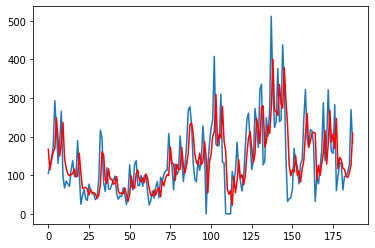

In [70]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()